# Курсовой проект для курса "Python для Data Science"

Материалы к проекту (файлы):
train.csv
test.csv

## Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

### Целевая переменная:
Price

### Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

### Сдача проекта:
1. Прислать в раздел Задания Урока 10 ("Вебинар. Консультация по итоговому проекту")
ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook
с расширением ipynb). (Pull request не нужен, только ссылка ведущая на сам скрипт).
2. Приложить файл с названием по образцу Ismolentsev_predictions.csv
с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).
В файле с предсказаниями должна быть 5001 строка (шапка + 5000 предсказаний).

### Сроки и условия сдачи:
Дедлайн: сдать проект нужно в течение 72 часов после начала Урока 10 ("Вебинар. Консультация по итоговому проекту").
Для успешной сдачи должны быть все предсказания (для 5000 квартир) и R2 должен быть больше 0.6.
При сдаче до дедлайна результат проекта может попасть в топ лучших результатов.
Повторная сдача и проверка результатов возможны только при условии предыдущей неуспешной сдачи.
Успешный проект нельзя пересдать в целях повышения результата.
Проекты, сданные после дедлайна или сданные повторно, не попадают в топ лучших результатов, но можно узнать результат.
В качестве итогового результата берется первый успешный результат, последующие успешные результаты не учитываются.

### Примечание:
Все файлы csv должны содержать названия полей (header - то есть "шапку"),
разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

### Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. При использовании статистик (среднее, медиана и т.д.) в качестве признаков,
лучше считать их на трейне, и потом на валидационных и тестовых данных не считать
статистики заново, а брать их с трейна. Если хватает знаний, можно использовать кросс-валидацию,
но для сдачи этого проекта достаточно разбить данные из train.csv на train и valid.
9. Проект должен полностью отрабатывать за разумное время (не больше 10 минут),
поэтому в финальный вариант лучше не включать GridSearch с перебором
большого количества сочетаний параметров.
10. Допускается применение библиотек Python и моделей машинного обучения,
которые были в курсе Python для Data Science. Градиентный бустинг изучается
в последующих курсах, поэтому в этом проекте его применять не следует.
Самая сложная из допустимых моделей - RandomForestRegressor из sklearn.



In [1]:
import pandas as pd

# Загрузка данных
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Просмотр первых строк тренировочных данных
print("Train Data Overview:")
print(train_data.head())

# Основная информация о тренировочном наборе данных
print("\nTrain Data Info:")
print(train_data.info())

# Описание статистики по числовым признакам
print("\nTrain Data Description:")
print(train_data.describe())

# Проверка на наличие пропусков в тренировочных данных
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

# Просмотр первых строк тестовых данных
print("\nTest Data Overview:")
print(test_data.head())

# Проверка на наличие пропусков в тестовых данных
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Train Data Overview:
      Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1

**Анализ данных**  

*Тренировочный набор данных (train.csv):*  
Включает 10,000 строк и 20 столбцов.  
Пропуски:  
LifeSquare: 2,113 пропущенных значений.  
Healthcare_1: 4,798 пропущенных значений.  

*Тестовый набор данных (test.csv):*  
Включает 5,000 строк и 19 столбцов (без столбца Price).  
Пропуски:  
LifeSquare: 1,041 пропущенное значение.  
Healthcare_1: 2,377 пропущенных значений.  

In [2]:
# Заполнение пропусков медианой в числовых признаках
train_data['LifeSquare'].fillna(train_data['LifeSquare'].median(), inplace=True)
train_data['Healthcare_1'].fillna(train_data['Healthcare_1'].median(), inplace=True)

test_data['LifeSquare'].fillna(test_data['LifeSquare'].median(), inplace=True)
test_data['Healthcare_1'].fillna(test_data['Healthcare_1'].median(), inplace=True)

# Проверка, что пропуски устранены
print("Missing Values in Train Data After Imputation:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data After Imputation:")
print(test_data.isnull().sum())


Missing Values in Train Data After Imputation:
Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

Missing Values in Test Data After Imputation:
Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64


Пропуски в данных успешно устранены как в тренировочном, так и в тестовом наборах.

In [3]:
# One-Hot Encoding для категориальных признаков
train_data = pd.get_dummies(train_data, columns=['Ecology_2', 'Ecology_3', 'Shops_2'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Ecology_2', 'Ecology_3', 'Shops_2'], drop_first=True)

# Проверка на совпадение набора признаков в train и test
missing_cols = set(train_data.columns) - set(test_data.columns)
for c in missing_cols:
    test_data[c] = 0

# Убедимся, что порядок столбцов совпадает
test_data = test_data[train_data.columns.drop('Price')]

# Проверка результатов
print("Train Data Columns:")
print(train_data.columns)

print("\nTest Data Columns:")
print(test_data.columns)


Train Data Columns:
Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price',
       'Ecology_2_B', 'Ecology_3_B', 'Shops_2_B'],
      dtype='object')

Test Data Columns:
Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_B',
       'Ecology_3_B', 'Shops_2_B'],
      dtype='object')


Кодирование категориальных признаков выполнено успешно. Теперь тренировочный и тестовый наборы данных имеют одинаковые признаки.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Разделение данных на признаки и целевую переменную
X = train_data.drop(columns=['Price', 'Id'])
y = train_data['Price']

# Разделение данных на обучающую и валидационную выборки (80/20)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Предсказание на валидационной выборке
y_pred = model.predict(X_valid)

# Оценка модели
r2 = r2_score(y_valid, y_pred)
print(f'R2 Score on Validation Data: {r2:.4f}')


R2 Score on Validation Data: 0.7121


Значение $R^2 = 0.7121$ на валидационной выборке показывает, что модель достаточно хорошо объясняет дисперсию цен на квартиры.

In [6]:
# Предсказание цен на тестовом наборе данных
test_predictions = model.predict(test_data.drop(columns=['Id']))

# Создание DataFrame с результатами
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'Price': test_predictions
})

# Сохранение результатов в файл
submission.to_csv('/content/ISmolentsev_predictions.csv', index=False)

print("Предсказания сохранены в Ismolentsev_predictions.csv")


Предсказания сохранены в Ismolentsev_predictions.csv


In [7]:
# Загрузка и отображение содержимого файла с предсказаниями для проверки
final_predictions = pd.read_csv('/content/ISmolentsev_predictions.csv')
final_predictions.head()


,Id,Price
0,725,160601.830168
1,15856,227212.422548
2,5480,182271.159690
3,15664,347234.804184
4,14275,145668.120988


from matplotlib import pyplot as plt
_df_0['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Id', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
# Проверка количества строк в файле с предсказаниями
num_rows = final_predictions.shape[0] + 1  # Добавляем одну строку для заголовка
num_rows


5001

In [9]:
# Проверка количества строк в файле с предсказаниями №2
final_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5000 non-null   int64  
 1   Price   5000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.2 KB


**Немного визуализаций для красочности проекта**

<ipython-input-10-0ae74312e84b>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rooms', data=train_data, ax=axes[1, 0], palette='viridis')
<ipython-input-10-0ae74312e84b>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


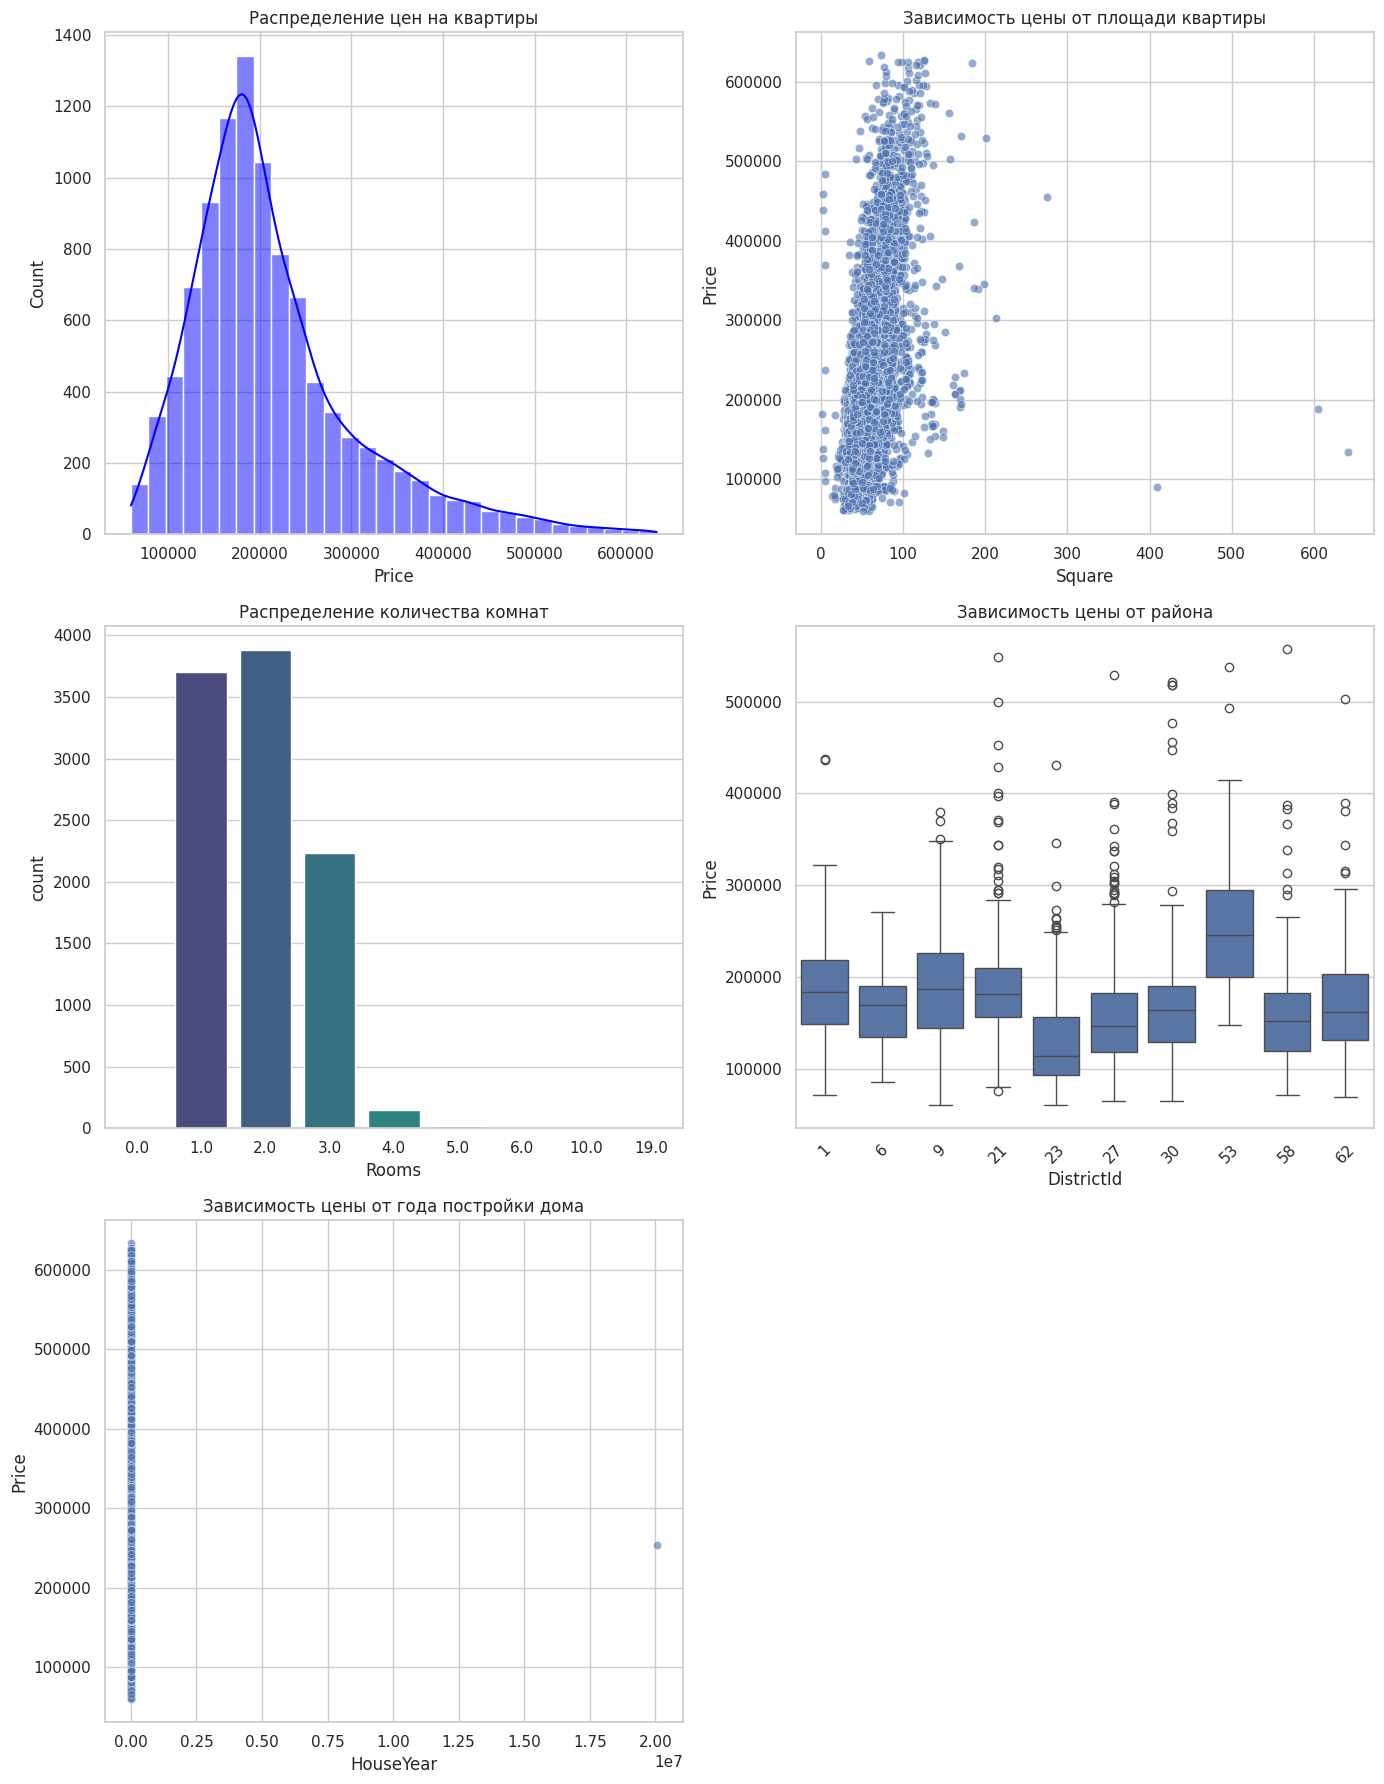

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля для графиков
sns.set(style="whitegrid")

# Создание фигуры для графиков
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

# График распределения цен на квартиры
sns.histplot(train_data['Price'], bins=30, ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('Распределение цен на квартиры')

# График зависимости цены от площади квартиры
sns.scatterplot(x='Square', y='Price', data=train_data, ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('Зависимость цены от площади квартиры')

# График распределения количества комнат
sns.countplot(x='Rooms', data=train_data, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Распределение количества комнат')

# График зависимости цены от района (DistrictId)
sns.boxplot(x='DistrictId', y='Price', data=train_data[train_data['DistrictId'].isin(train_data['DistrictId'].value_counts().head(10).index)], ax=axes[1, 1])
axes[1, 1].set_title('Зависимость цены от района')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

# График зависимости цены от года постройки дома
sns.scatterplot(x='HouseYear', y='Price', data=train_data, ax=axes[2, 0], alpha=0.6)
axes[2, 0].set_title('Зависимость цены от года постройки дома')

# Удаление пустого места для графика
fig.delaxes(axes[2, 1])

# Показать графики
plt.tight_layout()
plt.show()
